# Preparation

## Library installation/import

Install and import libraries that are used in multiple sections of the pipeline.

In [ ]:
%pip install --upgrade numpy
%pip install gensim

In [3]:
import pandas as pd

In [ ]:
%pip install spacy
%pip install wordcloud

In [ ]:
%pip install tweepy==4.6.0

In [ ]:
%pip show tweepy

## Configuring Twitter API keys

<font color="red">**IMPORTANT NOTE:** Please note that the API keys below are the course leader's own API keys. You are allowed to use it to do some small tests, but please be careful because all students in the class now have a copy of it, and hence the limits can be easily exceeded.</font>

If your group has decided to use Twitter data, you can [apply for your own keys](https://developer.twitter.com/en/apply-for-access).

In [28]:
import tweepy

auth = tweepy.OAuthHandler('BcWEliOxF0h6v9VWpUlNtS5nU', 'HfW6WHnnPqB5BkodYKgMTAihGbmEjioJpP3DhAekLLtVeb6xIi')
auth.set_access_token('841021709209731073-rRR8mlOkIw7pLGEnplp03nWwnYOGwJ3', 'Aa2c8dlmUOKzsRRRc0v6gELtKbJFAkcNwNzOe9T6uuCUQ')

api = tweepy.API(auth, wait_on_rate_limit=True) # , wait_on_rate_limit_notify=True

## Downloading of new data set

<font color="red">**IMPORTANT NOTE:** Please do not run the cell below unless intending to download a new data set. If you just want to see what the rest of the code in this notebook produces, you can skip this cell and proceed to the next one (under Data pre-processing/Cleaning), which will read data from the `current_set.csv` file that has been provided to you.</font>

Should you decide to run this cell, you can explore by changing the parameters.

Also, check the [Tweepy API reference](https://docs.tweepy.org/en/latest/api.html) to find out about other ways through which you can retrieve tweets, e.g., by specifying usernames.

**WARNING:** It is likely that the retrieved tweets, which will be displayed in succeeding cells, contain strong language that some might find offensive or disturbing.

In [29]:
# Collect tweets
query = "chatgpt" + " -filter:retweets"
tweets = tweepy.Cursor(api.search_tweets, q=query, lang="en", count=100).items(2000)

tweets_list = [[tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]

tweets_df = pd.DataFrame(data=tweets_list, columns=['date', 'user', 'location', 'text'])

# A good idea to save downloaded tweets as CSV
tweets_df.to_csv ('chatgpt.csv', quotechar='"', encoding='utf8', index = False, header=True)
print("Finish data generation.")

Rate limit reached. Sleeping for: 817


Finish data generation.


# Data pre-processing

## Cleaning

Below we provide some code for text cleaning. However, we encourage you to think of other ways to clean your data, e.g., by removing hashtags, removing usernames, removing duplicate tweets?

In [4]:
# Load the regular expression library
import re

# Make sure that line below is uncommented, if you are loading data from a provided/previously saved CSV
tweets_df = pd.read_csv('chatgpt.csv', quotechar='"', encoding='utf8')

# Remind the type of 'text' column, convert to string before using the map
tweets_df['text'] = tweets_df['text'].values.astype(str)

# Remove punctuation
tweets_df['text_processed'] = tweets_df['text'].map(lambda x: re.sub('[,\\.!?]', ' ', x))

# Remove unnecessary line breaks
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r"\n", '', x))

# Convert the titles to lowercase
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: x.lower())

# Strip the https
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'https://t [a-zA-Z+]*','',x))

#Strip the senseless pattern
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'/[A-Za-z0-9]*','',x))

# pattern of emoji
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)

# Strip the emoji
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: emoji_pattern.sub(r'',x))

# Set the option to display full details of processed string
pd.set_option('display.max_colwidth', None)

# Print out the first rows 
# print(tweets_df['text_processed'].head())

# Removing duplicate tweets?
unique_tweets = list(set(list(tweets_df['text_processed'].values)))
unique_tweets = [t for t in unique_tweets if t]

for i in unique_tweets:
    print(i)

feeling stuck with your writing  give chatgpt a try  our ai-powered prompts are designed to unlock creative ideas a… 
the new episode of south park about chatgpt is so damn good 
chatgpt in azure openai service  now available for preview   devs can integrate ai-powered experiences into their… 
it's friday  so that means it's time for #ai-generated jokes about #publicrelations #chatgpt  give us a pr joke … 
@marconeves any learning tasks for which having lots of examples or asking very specific questions would help  i feel #chatgpt is helpful
@silenthill_x microsoft and google's calculators are written with the order of operations built in  i would be very… 
this is it  chatgpt will present motd  it's been so obvious i don't know how i missed it
line to see #sxsw @openai keynote speaker wraps around the building    person in front of me: "f#@$ this  i'll just… 
google dusts off the failed google+ playbook to fight chatgpt  
automated writing platforms have the capacity to foster rather 

## Exploration using a word cloud

Generating a word cloud is one way by which you can check whether your data needs any further cleaning.

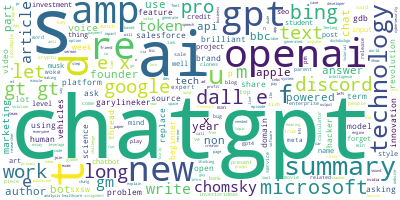

In [9]:
from wordcloud import WordCloud

# join the words of the different tweets together into one string
long_string = ' '.join(unique_tweets)
new_long_string = ' '.join(set(long_string.split(" ")))

# create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# generate a word cloud
wordcloud.generate(new_long_string)

# visualize the word cloud
wordcloud.to_image()

# Topic Modelling

In [10]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# Do you want to modify this by adding more stop words?
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) 
    if word not in stop_words] for doc in texts]


data = tweets_df.text_processed.values.tolist()

data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

# create a dictionary
id2word = corpora.Dictionary(data_words)

# create a corpus
texts = data_words

# convert the corpus into a BoW representation
corpus = [id2word.doc2bow(text) for text in texts]


In [11]:
from pprint import pprint

# set number of topics
num_topics = 5

# build an LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# print keywords in each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.103*"chatgpt" + 0.014*"ai" + 0.006*"openai" + 0.006*"new" + 0.004*"like" '
  '+ 0.004*"google" + 0.004*"get" + 0.004*"week" + 0.003*"next" + '
  '0.003*"write"'),
 (1,
  '0.070*"chatgpt" + 0.022*"ai" + 0.009*"using" + 0.006*"openai" + '
  '0.005*"like" + 0.005*"write" + 0.004*"would" + 0.004*"get" + 0.003*"people" '
  '+ 0.003*"microsoft"'),
 (2,
  '0.064*"chatgpt" + 0.017*"ai" + 0.010*"using" + 0.008*"next" + '
  '0.007*"explores" + 0.007*"week" + 0.007*"gm" + 0.006*"get" + 0.006*"like" + '
  '0.005*"would"'),
 (3,
  '0.056*"chatgpt" + 0.008*"ai" + 0.007*"asked" + 0.006*"write" + 0.005*"know" '
  '+ 0.004*"get" + 0.004*"help" + 0.004*"good" + 0.004*"motd" + 0.004*"new"'),
 (4,
  '0.028*"chatgpt" + 0.012*"ai" + 0.008*"like" + 0.004*"technology" + '
  '0.003*"think" + 0.002*"openai" + 0.002*"thing" + 0.002*"generated" + '
  '0.002*"google" + 0.002*"new"')]


In [ ]:
# visualise the topics
# %pip install pyldavis

In [12]:
import os
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
  pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

d:\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.039773 -0.045910       1        1  35.641065
2      0.080095  0.059842       2        1  21.627740
1     -0.013872  0.017621       3        1  19.134131
3     -0.017401 -0.077507       4        1  13.629011
4     -0.088595  0.045954       5        1   9.968052, topic_info=         Term        Freq       Total Category  logprob  loglift
117     using   87.000000   87.000000  Default  30.0000  30.0000
36         ai  261.000000  261.000000  Default  29.0000  29.0000
568  explores   33.000000   33.000000  Default  28.0000  28.0000
127        gm   32.000000   32.000000  Default  27.0000  27.0000
42      asked   44.000000   44.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
223       see    2.823084   20.388967   Topic5  -6.4107   0.3286
479     every    2.762966   13.394044   Topic5  -6.4323   0.7273
193       get    2.784292   69.366039   Topic5  -6.4246  -0.9096
693     check    2.741607   21.032871   Topic5  -6.4400   0.2682
614   someone    2.726776   15.851152   Topic5  -6.4454   0.5457

[390 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
419       1  0.100427   according
419       2  0.702992   according
419       3  0.100427   according
419       4  0.100427   according
419       5  0.050214   according
...     ...       ...         ...
11        5  0.047761     writing
273       1  0.807525       wrote
273       3  0.161505       wrote
648       4  0.699129         yes
4029      4  0.843566  zhiwei_luo

[757 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4, 5])

# Sentiment Analysis

This implementation is based on the lexicon- and rule-based [VADER](https://github.com/cjhutto/vaderSentiment) sentiment analysis tool.

In [ ]:
# %pip install vaderSentiment

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


In [52]:

for tweet_text in unique_tweets:
    vs = analyzer.polarity_scores(tweet_text)
    print(tweet_text + '\t' + str(vs))

feeling stuck with your writing  give chatgpt a try  our ai-powered prompts are designed to unlock creative ideas a… 	{'neg': 0.089, 'neu': 0.714, 'pos': 0.196, 'compound': 0.34}
the new episode of south park about chatgpt is so damn good 	{'neg': 0.209, 'neu': 0.6, 'pos': 0.191, 'compound': -0.0805}
chatgpt in azure openai service  now available for preview   devs can integrate ai-powered experiences into their… 	{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
it's friday  so that means it's time for #ai-generated jokes about #publicrelations #chatgpt  give us a pr joke … 	{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.4939}
@marconeves any learning tasks for which having lots of examples or asking very specific questions would help  i feel #chatgpt is helpful	{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.6705}
@silenthill_x microsoft and google's calculators are written with the order of operations built in  i would be very… 	{'neg': 0.0, 'neu': 1.0, 'pos': 0.0

# Named Entity Recognition


This implementation is based on [spaCy's model](https://spacy.io/models/en#en_core_web_trf) using contextualised embeddings.

In [8]:
# %pip install spacy-transformers
# !python -m spacy download en_core_web_trf
import spacy
import en_core_web_trf

nlp = spacy.load('en_core_web_trf')

In [14]:
for tweet_text in unique_tweets:
  doc = nlp(tweet_text)
  print(tweet_text)
  for ne in doc.ents:
    print('\tNE found: ', ne.start_char, ne.end_char, ne.label_, tweet_text[ne.start_char:ne.end_char])


@presssec @wagnertonight who writes these for you  chatgpt   
at torre  we won't be using knowledge tests anymore  why  because they've become too easy to cheat with chatgpt  et… 
	NE found:  3 8 GPE torre
@tveskov when nokia released the 5110 with different colours in australia  we could only send sms to same network … 
	NE found:  14 19 ORG nokia
	NE found:  33 37 PRODUCT 5110
	NE found:  64 73 GPE australia
basic motors explores utilizing chatgpt in automobiles
	NE found:  0 12 ORG basic motors
time for #chatgpt to turn up 
noam chomsky exposes chatgpt  | muslim news | mar 9  2023  via @youtube
	NE found:  0 12 PERSON noam chomsky
	NE found:  21 28 ORG chatgpt
	NE found:  32 43 ORG muslim news
	NE found:  46 53 DATE mar 9  
@kokiaaryanzfan praise  my brain is empty rnlemme ask suggestions from chatgpt 
	NE found:  71 78 ORG chatgpt
looking forward to seeing chatgpt presenting #motd tomorrow night   
	NE found:  26 33 ORG chatgpt
	NE found:  45 46 PERSON #
	NE found:  51 65 TIME tomo

# Named Entity Linking

This implementation is based on [spaCy Entity Linker](https://github.com/egerber/spacy-entity-linker).

In [6]:
# !pip install spacy-entity-linker
# !python -m spacy download en_core_web_md

import en_core_web_md
from spacy.language import Language

In [9]:
from spacy_entity_linker import EntityLinker

# !python -m spacy_entity_linker "download_knowledge_base"

nlp = spacy.load("en_core_web_md")

#add to pipeline
nlp.add_pipe('entityLinker', last=True)

In [17]:
for tweet_text in unique_tweets:
  try:
    doc = nlp(tweet_text)
    print(tweet_text)
    all_linked_entities = doc._.linkedEntities
    for linked_entity in all_linked_entities:
      print(linked_entity.get_url() + ' ' + linked_entity.pretty_string(True))
  except:
    pass


@presssec @wagnertonight who writes these for you  chatgpt   
at torre  we won't be using knowledge tests anymore  why  because they've become too easy to cheat with chatgpt  et… 
https://www.wikidata.org/wiki/Q3547904 torre  => Torre <river in Friuli-Venezia Giulia, northeast Italy>
https://www.wikidata.org/wiki/Q9081 knowledge  => knowledge <familiarity, awareness, or understanding of someone or something (facts, information, descriptions, skills) which is acquired through experience or education by perceiving, discovering, or learning; theoretical or practical understanding of a subject>
https://www.wikidata.org/wiki/Q115 et  => Ethiopia <country in East Africa>
@tveskov when nokia released the 5110 with different colours in australia  we could only send sms to same network … 
https://www.wikidata.org/wiki/Q1418 nokia  => Nokia <Finnish multinational telecommunications, information technology, and consumer electronics company>
https://www.wikidata.org/wiki/Q1075 colours  => color <v

# Task 2

In [50]:
from spacy import displacy

# pog_sentence = unique_tweets[3]

def find_prosandcons(results, pog_sentence):

    doc = nlp(pog_sentence)
    for token in doc:
        if token.pos_ == 'VERB':
            dependents = token.children
            for d in dependents:

                token_text = token.text

                if d.dep_ == 'prep':
                    token_text = token_text + ' ' + d.text
                    for pobjs in d.children:
                        if pobjs.dep_ == 'pobj':
                            token_text = token_text + ' ' + pobjs.text
                    results.append(token_text)

                elif d.dep_ == 'agent':
                    token_text = token_text + ' ' + d.text
                    for pobjs in d.children:
                        if pobjs.dep_ == 'pobj':
                            token_text = token_text + ' ' + pobjs.text
                    results.append(token_text)

                elif d.dep_ == 'dobj':
                    token_text = token_text + ' ' + d.text
                    for preps in d.children:
                        if preps.dep_ == 'prep':
                            token_text = token_text + ' ' + preps.text
                            for pobjs in preps.children:
                                if pobjs.dep_ == 'pobj':
                                    token_text = token_text + ' ' + pobjs.text
                    results.append(token_text)
                
                elif d.dep_ == 'acomp':
                    token_text = token_text + ' ' + d.text
                    for preps in d.children:
                        if preps.dep_ == 'prep':
                            token_text = token_text + ' ' + preps.text
                            for pobjs in preps.children:
                                if pobjs.dep_ == 'pobj':
                                    token_text = token_text + ' ' + pobjs.text
                    results.append(token_text)
    
    return results
    
    # for token in doc:
    #     print(token.text + '\t' + token.lemma_ + '\t' + token.pos_ + '\t' + token.tag_ + '\t' + token.dep_ + '\t' + str([child.text + ':' + child.dep_ for child in token.children]))

# find_prosandcons(unique_tweets[3])





In [54]:
pros = []
cons = []

for index, tweet_text in enumerate(unique_tweets):
    vs = analyzer.polarity_scores(tweet_text)
    neg, neu, pos, compound = vs['neg'], vs['neu'], vs['pos'], vs['compound']
    if compound > 0.1: # and pos >= neu and pos >= compound
        pros = find_prosandcons(pros, tweet_text)
    if compound < -0.4: # 
        cons = find_prosandcons(cons, tweet_text)
for i in cons:
    print(i)
        

dusts off google+
fight chatgpt
have capacity
foster than literacy
predicting crash
writing emails
explain to me
explain in terms
using it
using as way
get through block
hate chatgpt
despise them
despise with fiber
get on
launching se
dislike chatgpt
disliking diffusion
saw demo of someone
describing problem to ch
simulate process of
say what
say by
using lm
complaining about price
have clue
generates bullshit
working on a
using chatgpt
get it
putting prompts
utilize it
see chatgpt
throwing spears
dusts off google+
fight slashdot
know state of union2⃣
killed in earthq
returned for reasons
call chatgpt
call on bullshit
predicted dangers of
ai t
get imgn
go with feature
reading piece
found usecase for chatgpt
solving parents
related problems
arguing infer
enabled fraud
threatens industry
hear me
updates bot
updates with
rolls summaries
using symmetry of distribution
simplify expression
simplify to e(|x|
simplify over ∞
according to report
ignore potential of generat
removing clause about